# Import packages

In [1]:
import os
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
dataset_dir = "../res/images"

In [3]:
# Each species' pictures are stored in a separate directory which
# names are as follows:
labels = [
    "Species1",
    "Species2",
    "Species3",
    "Species4",
    "Species5",
    "Species6",
    "Species7",
    "Species8"
]

### How many images per species ?

Text(0.5, 1.0, 'Number of training pictures per species')

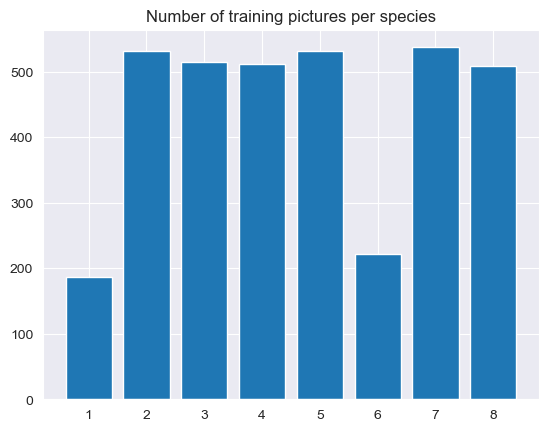

In [4]:
label_counts = []
for species in labels:
    label_counts.append(len(os.listdir("{}/{}/".format(dataset_dir, species))))

plt.bar(np.arange(1,9), label_counts)
plt.title("Number of training pictures per species")

There is a clear imbalance between species in the amount of data we have for training. Namely, species 1 and 6 have way fewer pictures to train the model with. We will need to account for this imbalance when doing **data augmentation** so that the augmented data will be somewhat balanced.

## Show one random image of each plant species

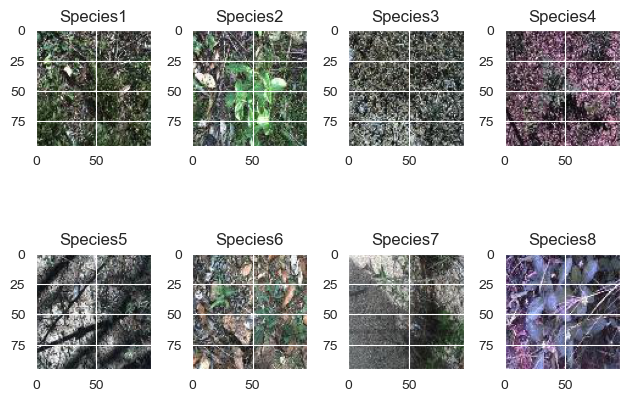

In [5]:
num_row = 2
num_col = 4
fig, axes = plt.subplots(num_row, num_col)
for i in range(num_row*num_col):
  if i < 8:
    class_imgs = next(os.walk('{}/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[np.random.randint(len(class_imgs))]
    img = Image.open('{}/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

## Let's make sure of the consistency of the input type and size

In [6]:
img_width, img_height, img_mode = img.width, img.height, img.mode

image_files = glob.glob("../res/images/*/*")

input_consistency = all(
    [
    Image.open(image).width == img_width and \
    Image.open(image).height == img_height and \
    Image.open(image).mode == img_mode for \
    image in glob.glob("../res/images/*/*")
    ]
)

if input_consistency:
    print("The %d pictures of the dataset are consistent in size (%d, %d) and color encoding (%s)." %
          (len(image_files), img_width, img_height, img_mode))
else:
    print("The input data is inconsistent !")

The 3542 pictures of the dataset are consistent in size (96, 96) and color encoding (RGB).


## To sum up:
### 3542 pictures of which:
- 186 of species 1
- 532 of species 2
- 515 of species 3
- 511 of species 4
- 531 of species 5
- 222 of species 6
- 537 of species 7
- 508 of species 8

Of size (96 x 96) pixels encoded in RGB space (depth = 3 channels)

### Input $ I \in \{0, 1, 2 ... 255\}^{96 \times 96 \times 3}$
### Output $ K \in [0;1]^{8} $